In [15]:
%matplotlib inline

In [16]:
from __future__ import division
import numpy as np
from mapalign.embed import compute_diffusion_map
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# fake data and compute correlations
X = np.random.randint(0,1000,size=(500,200))
corr = np.corrcoef(X)

# correlation matrix with ones on diagonal and positive version
corr1 = corr.copy()
L1 = (corr1+1)/2

# correlation matrix with zeros on diagonal, positive version (0.5 on diagonal), correction back to zero diagonal
corr0 = corr.copy()
corr0[np.where(np.eye(corr0.shape[0])==1)]=0.0
L05 = (corr0+1)/2
L0 = L05.copy()
L0[np.where(np.eye(L0.shape[0])==1)]=0.0

# embedding of all threee versions
E1, R1 = compute_diffusion_map(L1, n_components=10)
E0, R0 = compute_diffusion_map(L0, n_components=10)
E05, R05 = compute_diffusion_map(L05, n_components=10)

In [18]:
# test similarity
E0_E1 = False
E0_E05 = False
E05_E1 = False
tol = 0.000001

while any([E0_E1, E0_E05, E05_E1])==False:

    E1_E0 = np.allclose(E0,E1,atol=tol)
    if E1_E0 == True:
        print "E0 = E1 with tolerance %s"%str(tol)

    E0_E05 = np.allclose(E0,E05,atol=tol)
    if E0_E05 == True:
        print "E0 = E05 with tolerance %s"%str(tol)

    E05_E1 = np.allclose(E05,E1,atol=tol)
    if E05_E1 == True:
        print "E0 = E05 with tolerance %s"%str(tol)

    tol *= 10

E0 = E1 with tolerance 0.1
E0 = E05 with tolerance 0.1
E0 = E05 with tolerance 0.1


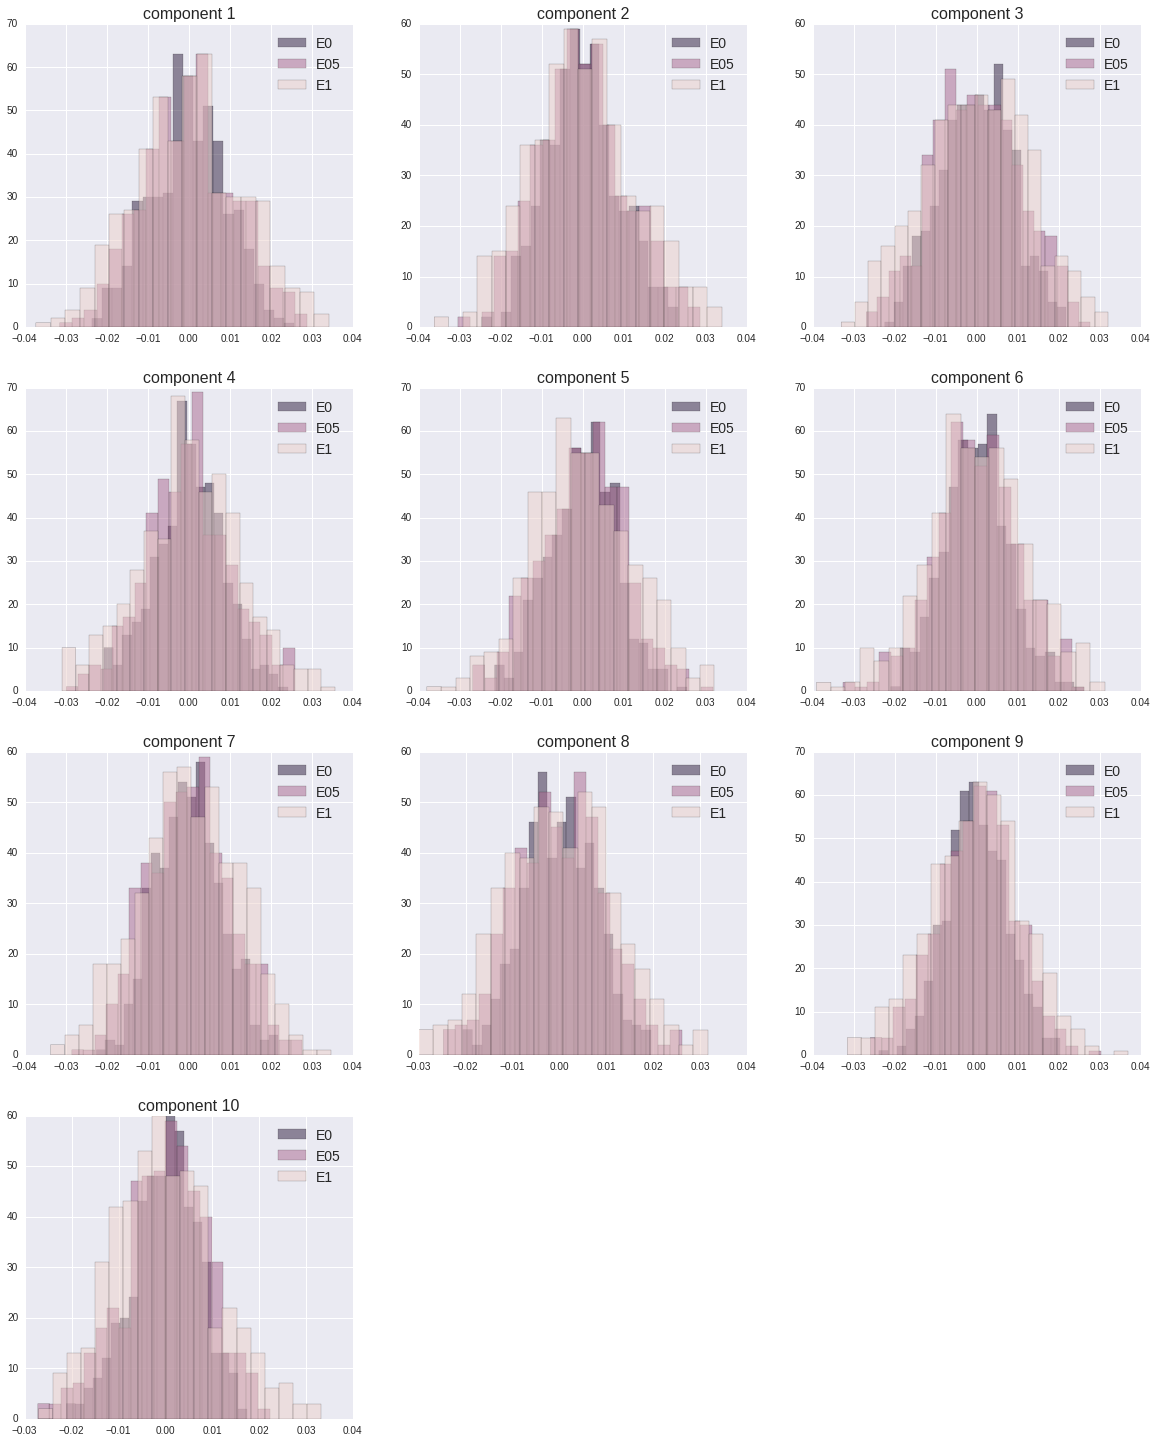

In [19]:
sns.set_context('notebook')
#cmap=sns.diverging_palette(220, 20, n=3, center='dark')
cmap=sns.cubehelix_palette(3)
fig = plt.figure(figsize=(20,25))
for i in range(10):
    fig.add_subplot(4,3,i+1)
    plt.hist(E0[:,i], bins=20, color=cmap[2], alpha=0.5, label='E0')
    plt.hist(E05[:,i], bins=20, color=cmap[1], alpha=0.5, label='E05')
    plt.hist(E1[:,i], bins=20, color=cmap[0], alpha=0.5, label='E1')
    plt.title('component %s'%str(i+1), fontsize=16)
    plt.legend(fontsize=14)
plt.show()